In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
import itertools
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
Base = pd.read_csv(r"../Datos/Train.csv", dtype = {'ID' : 'str'})

Nuevos_nombres  = {'Gender' : 'Genero'
                   ,'Ever_Married' : 'Casado'
                   ,'Age' : 'Edad'
                   ,'Graduated' : 'Graduado'
                   ,'Profession' : 'Profesión'
                   ,'Work_Experience' : 'Experiencia_Laboral'
                   ,'Spending_Score' : 'Categoría_Gasto'
                   ,'Family_Size' : 'Tamaño_Familia'
                   ,'Var_1' : 'Var_1'  }

Base.rename(columns=Nuevos_nombres, inplace=True)
Base.drop(columns=['Var_1'], inplace=True)

### Descripción General de la Base

In [3]:
print('\033[1mLa base inicial tiene '+ str(Base.shape[0])+ ' filas y ' + str(Base.shape[1]) + ' columnas\033[0m')
print('\033[1mA continuación se muestran las primeras 5 filas de la base\n\033[0m')
Base.head(5)
#Base.info()

La base inicial tiene 8068 filas y 10 columnas
A continuación se muestran las primeras 5 filas de la base



,ID,Genero,Casado,Edad,Graduado,Profesión,Experiencia_Laboral,Categoría_Gasto,Tamaño_Familia,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


In [4]:
print('\033[1mA continuación se muestra la cantidad y el porcentaje de datos faltantes que se tienen por columna\033[0m')
cantidad_nulos = pd.DataFrame(Base.isnull().sum())
cantidad_nulos.rename( columns = {0:'Cantidad_Nulos'}, inplace = True )
cantidad_nulos['Porcentaje_Nulos'] = round(cantidad_nulos['Cantidad_Nulos'] / len(Base),2)
cantidad_nulos.sort_values( by = 'Cantidad_Nulos' ,ascending=False, inplace = True)

Variables_con_nulos = cantidad_nulos [cantidad_nulos['Porcentaje_Nulos'] > 0]
Variables_con_nulos

A continuación se muestra la cantidad y el porcentaje de datos faltantes que se tienen por columna


,Cantidad_Nulos,Porcentaje_Nulos
Experiencia_Laboral,829,0.10
Tamaño_Familia,335,0.04
Casado,140,0.02
Profesión,124,0.02
Graduado,78,0.01


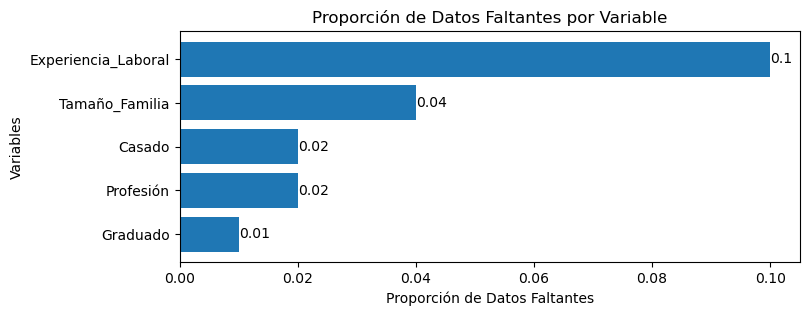

In [5]:
plt.figure(figsize=(8, 3))
Barras = plt.barh(Variables_con_nulos.index, Variables_con_nulos['Porcentaje_Nulos'], color='#1f77b4')
plt.title('Proporción de Datos Faltantes por Variable')
plt.xlabel('Proporción de Datos Faltantes')
plt.ylabel('Variables')
plt.gca().invert_yaxis()  # Invertir el eje Y para que las barras se ordenen de mayor a menor

for Barra in Barras:
    plt.text(Barra.get_width(), Barra.get_y() + Barra.get_height()/2, f'{Barra.get_width():.0}', 
             va='center', ha='left', color='black')

plt.show()

### Analisis descriptivo Variables Numericas

In [6]:
Analisis_Descriptivo = round(Base.describe(),2)
Variables_Numericas = Analisis_Descriptivo.columns
coef_var = (Base[Variables_Numericas].std() / Base[Variables_Numericas].mean())
Analisis_Descriptivo.loc['coef_var'] = coef_var
Analisis_Descriptivo = Analisis_Descriptivo.round(2)
Analisis_Descriptivo

,Edad,Experiencia_Laboral,Tamaño_Familia
count,8068.00,7239.00,7733.00
mean,43.47,2.64,2.85
std,16.71,3.41,1.53
min,18.00,0.00,1.00
25%,30.00,0.00,2.00
50%,40.00,1.00,3.00
75%,53.00,4.00,4.00
max,89.00,14.00,9.00
coef_var,0.38,1.29,0.54


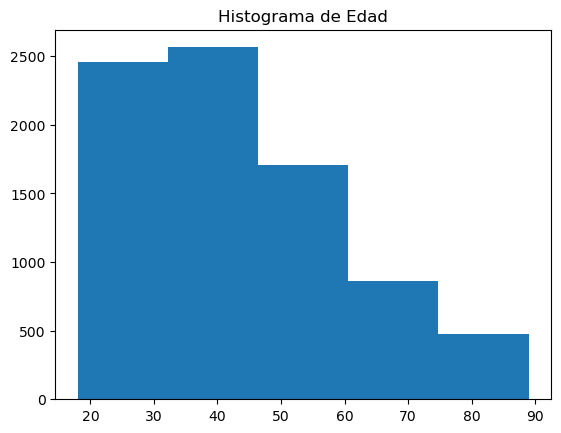

Columna: Edad
Estadístico de Anderson-Darling: 102.26382016279422
Valores críticos: [0.576 0.656 0.787 0.918 1.091]
Niveles de significancia correspondientes: [15.  10.   5.   2.5  1. ]
Los datos de esta variable no siguen una distribución normal (se rechaza H0)



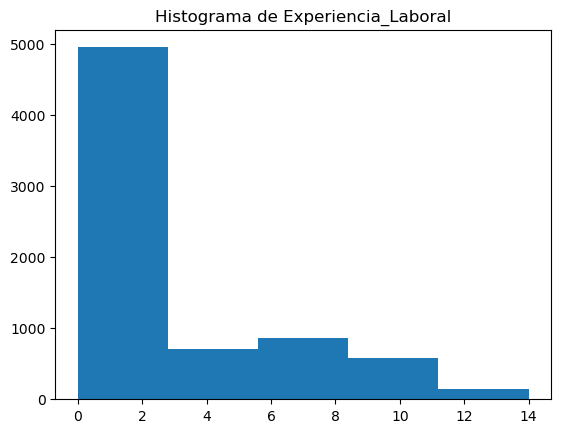

Columna: Experiencia_Laboral
Estadístico de Anderson-Darling: nan
Valores críticos: [0.576 0.656 0.787 0.918 1.091]
Niveles de significancia correspondientes: [15.  10.   5.   2.5  1. ]
Los datos de esta variable siguen una distribución normal (no se rechaza H0)



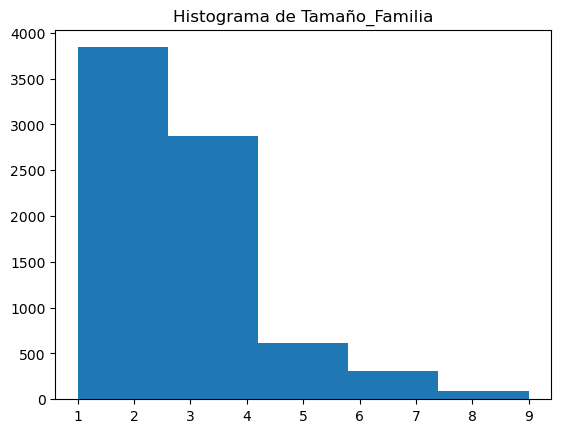

Columna: Tamaño_Familia
Estadístico de Anderson-Darling: nan
Valores críticos: [0.576 0.656 0.787 0.918 1.091]
Niveles de significancia correspondientes: [15.  10.   5.   2.5  1. ]
Los datos de esta variable siguen una distribución normal (no se rechaza H0)



In [7]:
for Columna in Variables_Numericas:
    plt.hist(Base[Columna], bins=5)
    mensaje = ['Histograma de ' + Columna]
    plt.title(" ".join(mensaje))
    plt.show()
    Data_Columna = Base[Columna].values
    Resultado = stats.anderson(Data_Columna)
    print("Columna:", Columna)
    print("Estadístico de Anderson-Darling:", Resultado.statistic)
    print("Valores críticos:", Resultado.critical_values)
    print("Niveles de significancia correspondientes:", Resultado.significance_level)
    print("\033[1mLos datos de esta variable no siguen una distribución normal (se rechaza H0)\n\033[0m") if Resultado.statistic > Resultado.critical_values[2] else print("\033[1mLos datos de esta variable siguen una distribución normal (no se rechaza H0)\n\033[0m")

### Analisis descriptivo valiables categoricas

Male      54.747149
Female    45.252851
Name: Genero, dtype: float64

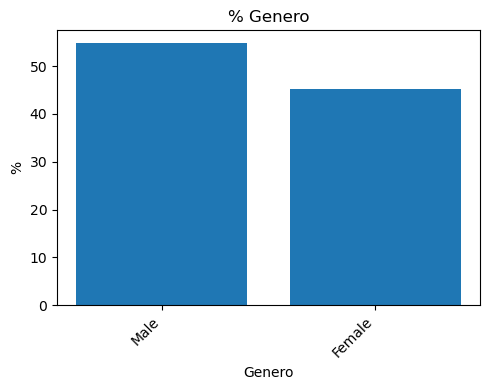

Yes    58.564581
No     41.435419
Name: Casado, dtype: float64

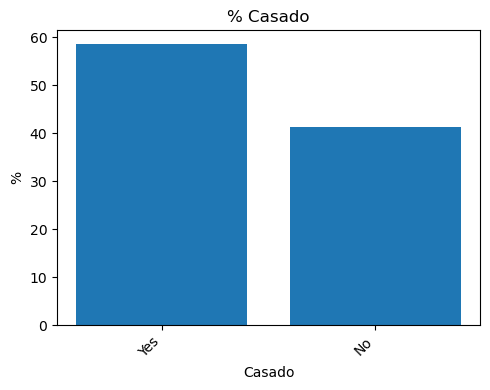

Yes    62.177722
No     37.822278
Name: Graduado, dtype: float64

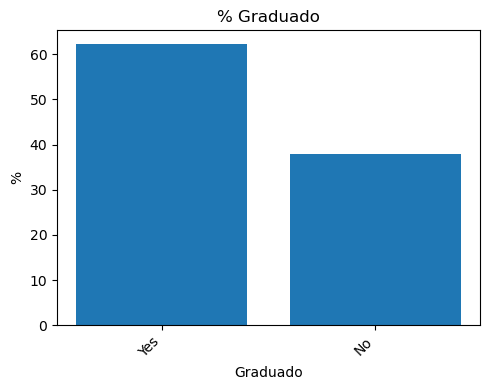

Artist           31.671702
Healthcare       16.767372
Entertainment    11.946123
Engineer          8.799094
Doctor            8.660624
Lawyer            7.842397
Executive         7.540282
Marketing         3.675730
Homemaker         3.096677
Name: Profesión, dtype: float64

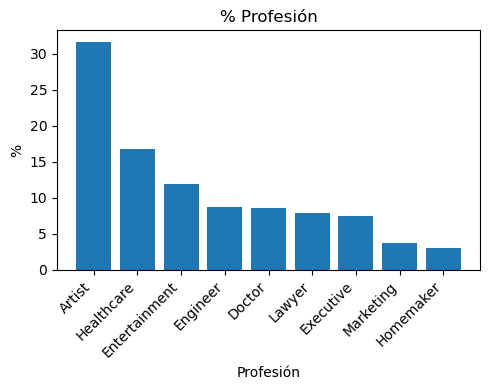

Low        60.461081
Average    24.467030
High       15.071889
Name: Categoría_Gasto, dtype: float64

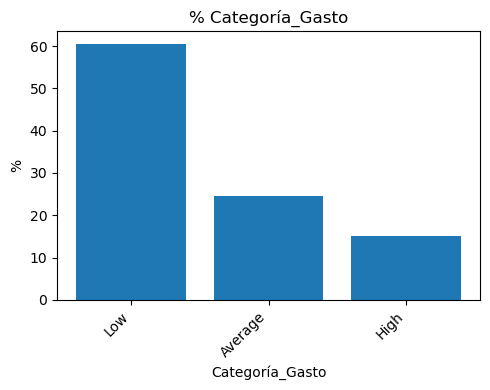

D    28.111056
A    24.442241
C    24.417452
B    23.029251
Name: Segmentation, dtype: float64

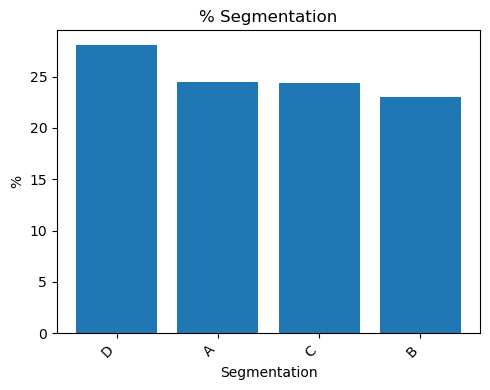

In [8]:
Variables_Categoricas = Base.drop(columns=list(Variables_Numericas) + ['ID']).columns
for Variable in Variables_Categoricas:
    frecuencia = Base[Variable].value_counts(normalize=True) * 100
    display(frecuencia)
    fig = plt.figure(figsize=(5, 4))  # Ajusta el tamaño de la figura según tus necesidades
    plt.bar(frecuencia.index, frecuencia.values)
    plt.xlabel(Variable)
    plt.ylabel('%')
    plt.title('% ' + Variable)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Relacion Entre Variables

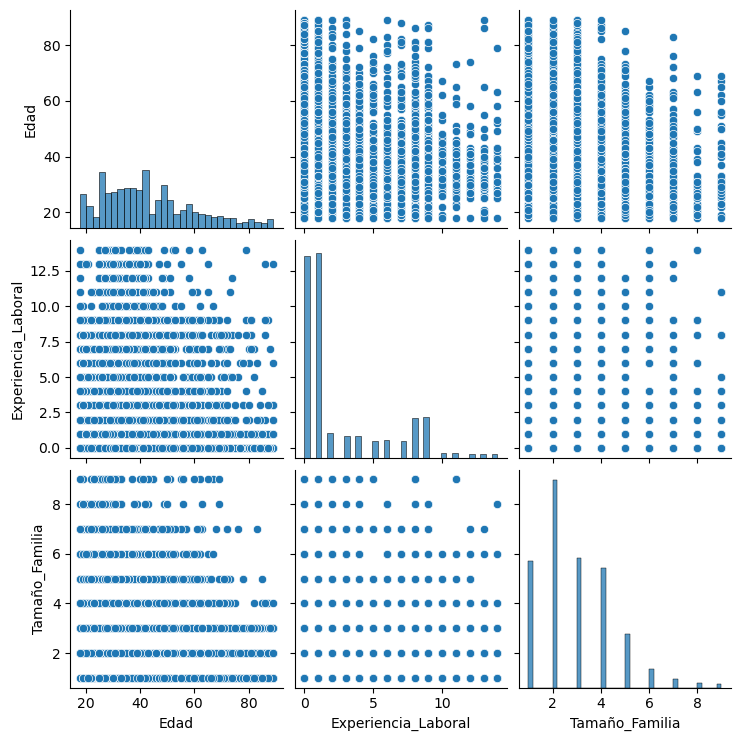

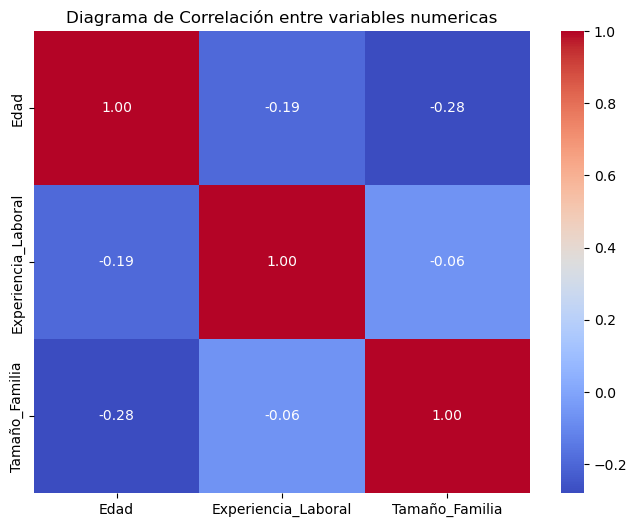

In [9]:
sns.pairplot(Base[Variables_Numericas], kind="scatter")
correlation_matrix = Base[Variables_Numericas].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Diagrama de Correlación entre variables numericas')
plt.show()

### Relacion Entre las Variables Categoricas

In [10]:
for Variable_Principal, Variable in itertools.combinations(Variables_Categoricas, 2):
    print("\033[1m" + Variable_Principal + " - " + Variable +  "\n\033[0m")
    Tabla_contingencia = pd.crosstab(Base[Variable_Principal], Base[Variable])
    chi2, p_valor, grados_libertad, _ = chi2_contingency(Tabla_contingencia)
    
    n = Tabla_contingencia.sum().sum()  
    min_dim = min(Tabla_contingencia.shape) - 1  
    v_cramer = np.sqrt(chi2 / (n * min_dim))
    
    print("Tabla de contingencia:\n", Tabla_contingencia)
    print("\nEstadístico de chi-cuadrado:", chi2)
    print("Valor p:", p_valor)
    print("Grados de libertad:", grados_libertad)
    print("V de Cramer:", v_cramer)
    
    alpha = 0.05
    if p_valor < alpha:
        print(f"\033[1mSe rechaza la hipótesis nula: Hay una relación significativa entre las variables '{Variable_Principal}' y '{Variable}'\n\033[0m")
    else:
        print(f"\033[1mNo se puede rechazar la hipótesis nula: No hay una relación significativa entre las variables '{Variable_Principal}' y '{Variable}'\n\033[0m")

Genero - Casado

Tabla de contingencia:
 Casado    No   Yes
Genero            
Female  1707  1868
Male    1578  2775

Estadístico de chi-cuadrado: 106.45507245244583
Valor p: 5.860621184578301e-25
Grados de libertad: 1
V de Cramer: 0.1158780982735355
Se rechaza la hipótesis nula: Hay una relación significativa entre las variables 'Genero' y 'Casado'

Genero - Graduado

Tabla de contingencia:
 Graduado    No   Yes
Genero              
Female    1303  2316
Male      1719  2652

Estadístico de chi-cuadrado: 9.15513517901195
Valor p: 0.002480210554643687
Grados de libertad: 1
V de Cramer: 0.03385002477988003
Se rechaza la hipótesis nula: Hay una relación significativa entre las variables 'Genero' y 'Graduado'

Genero - Profesión

Tabla de contingencia:
 Profesión  Artist  Doctor  Engineer  Entertainment  Executive  Healthcare  \
Genero                                                                      
Female       1213     304       559            253         32         557   
Male     

### Relacion Entre variables Numericas y Categoricas

In [11]:
for Categorica in Variables_Categoricas:
    for Variable in Variables_Numericas:
        print(f"\033[1m{Variable} ~ {Categorica}\033[0m")
        formula = f'{Variable} ~ C({Categorica})'
        model = ols(formula, data=Base).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(anova_table)
        print('\n')


Edad ~ Genero
                 sum_sq      df         F    PR(>F)
C(Genero)  2.056948e+03     1.0  7.370977  0.006643
Residual   2.250901e+06  8066.0       NaN       NaN


Experiencia_Laboral ~ Genero
                 sum_sq      df          F        PR(>F)
C(Genero)    301.191233     1.0  26.041045  3.427446e-07
Residual   83703.283142  7237.0        NaN           NaN


Tamaño_Familia ~ Genero
                 sum_sq      df          F        PR(>F)
C(Genero)     56.684544     1.0  24.242834  8.668190e-07
Residual   18076.607840  7731.0        NaN           NaN


Edad ~ Casado
                 sum_sq      df           F  PR(>F)
C(Casado)  7.121301e+05     1.0  3758.00588     0.0
Residual   1.501952e+06  7926.0         NaN     NaN


Experiencia_Laboral ~ Casado
                 sum_sq      df        F        PR(>F)
C(Casado)    780.965778     1.0  68.0094  1.921196e-16
Residual   81760.409117  7120.0      NaN           NaN


Tamaño_Familia ~ Casado
                 sum_sq      df      

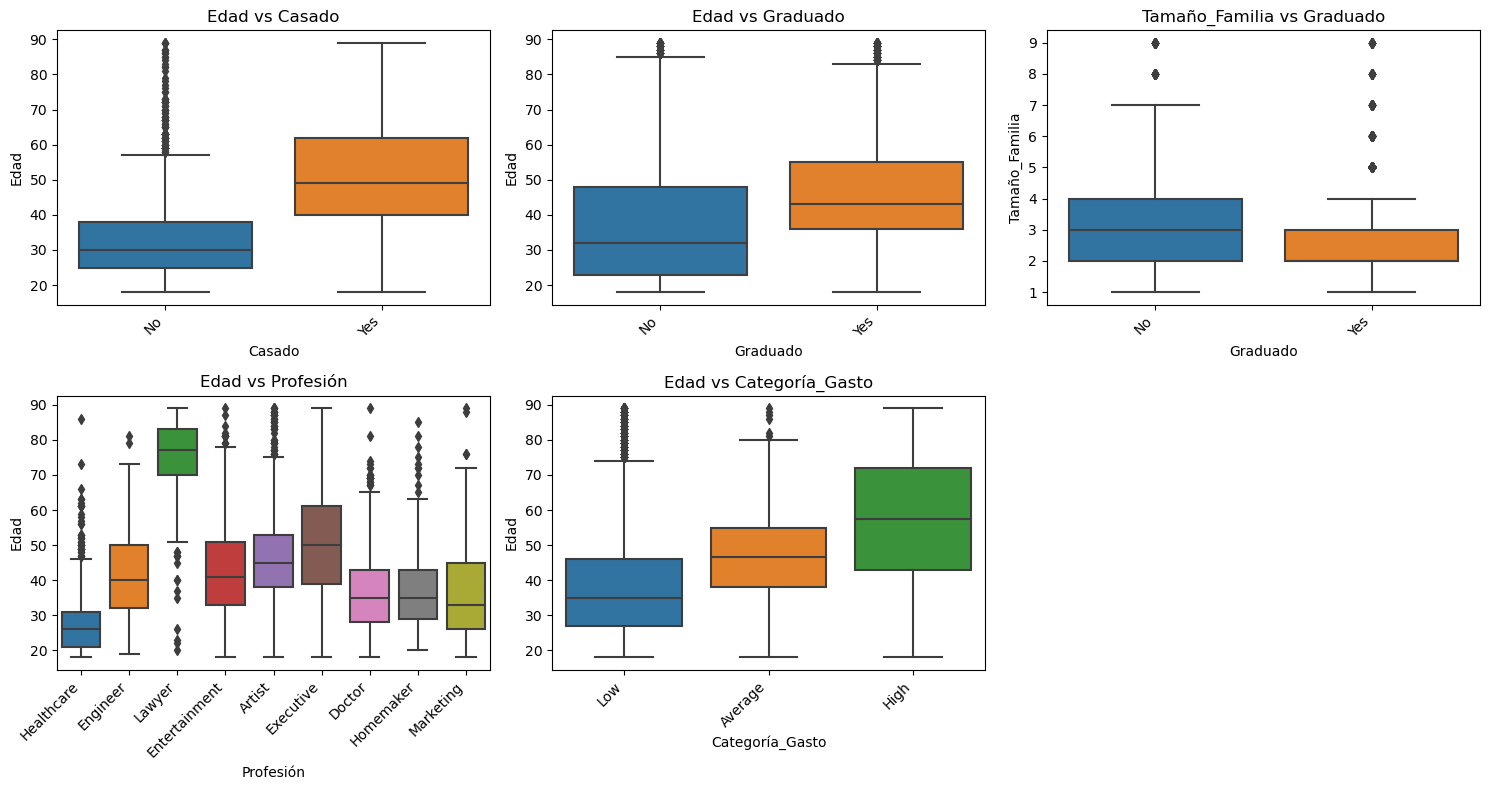

In [12]:
Combinaciones = [
    ('Edad', 'Casado'),
    ('Edad', 'Graduado'),
    ('Tamaño_Familia', 'Graduado'),
    ('Edad', 'Profesión'),
    ('Edad', 'Categoría_Gasto')]

ncols = 3
num_plots = len(Combinaciones)
nrows = (num_plots + 1) // ncols  


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))

for ax, (Variable_numerica, Variable_categorica) in zip(axes.flatten(), Combinaciones):
    sns.boxplot(x=Variable_categorica, y=Variable_numerica, data=Base, ax=ax)
    ax.set_title(f'{Variable_numerica} vs {Variable_categorica}')
    ax.set_xlabel(Variable_categorica)
    ax.set_ylabel(Variable_numerica)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

if num_plots % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.suptitle('')  
plt.show()

### Imputación de Datos Faltantes

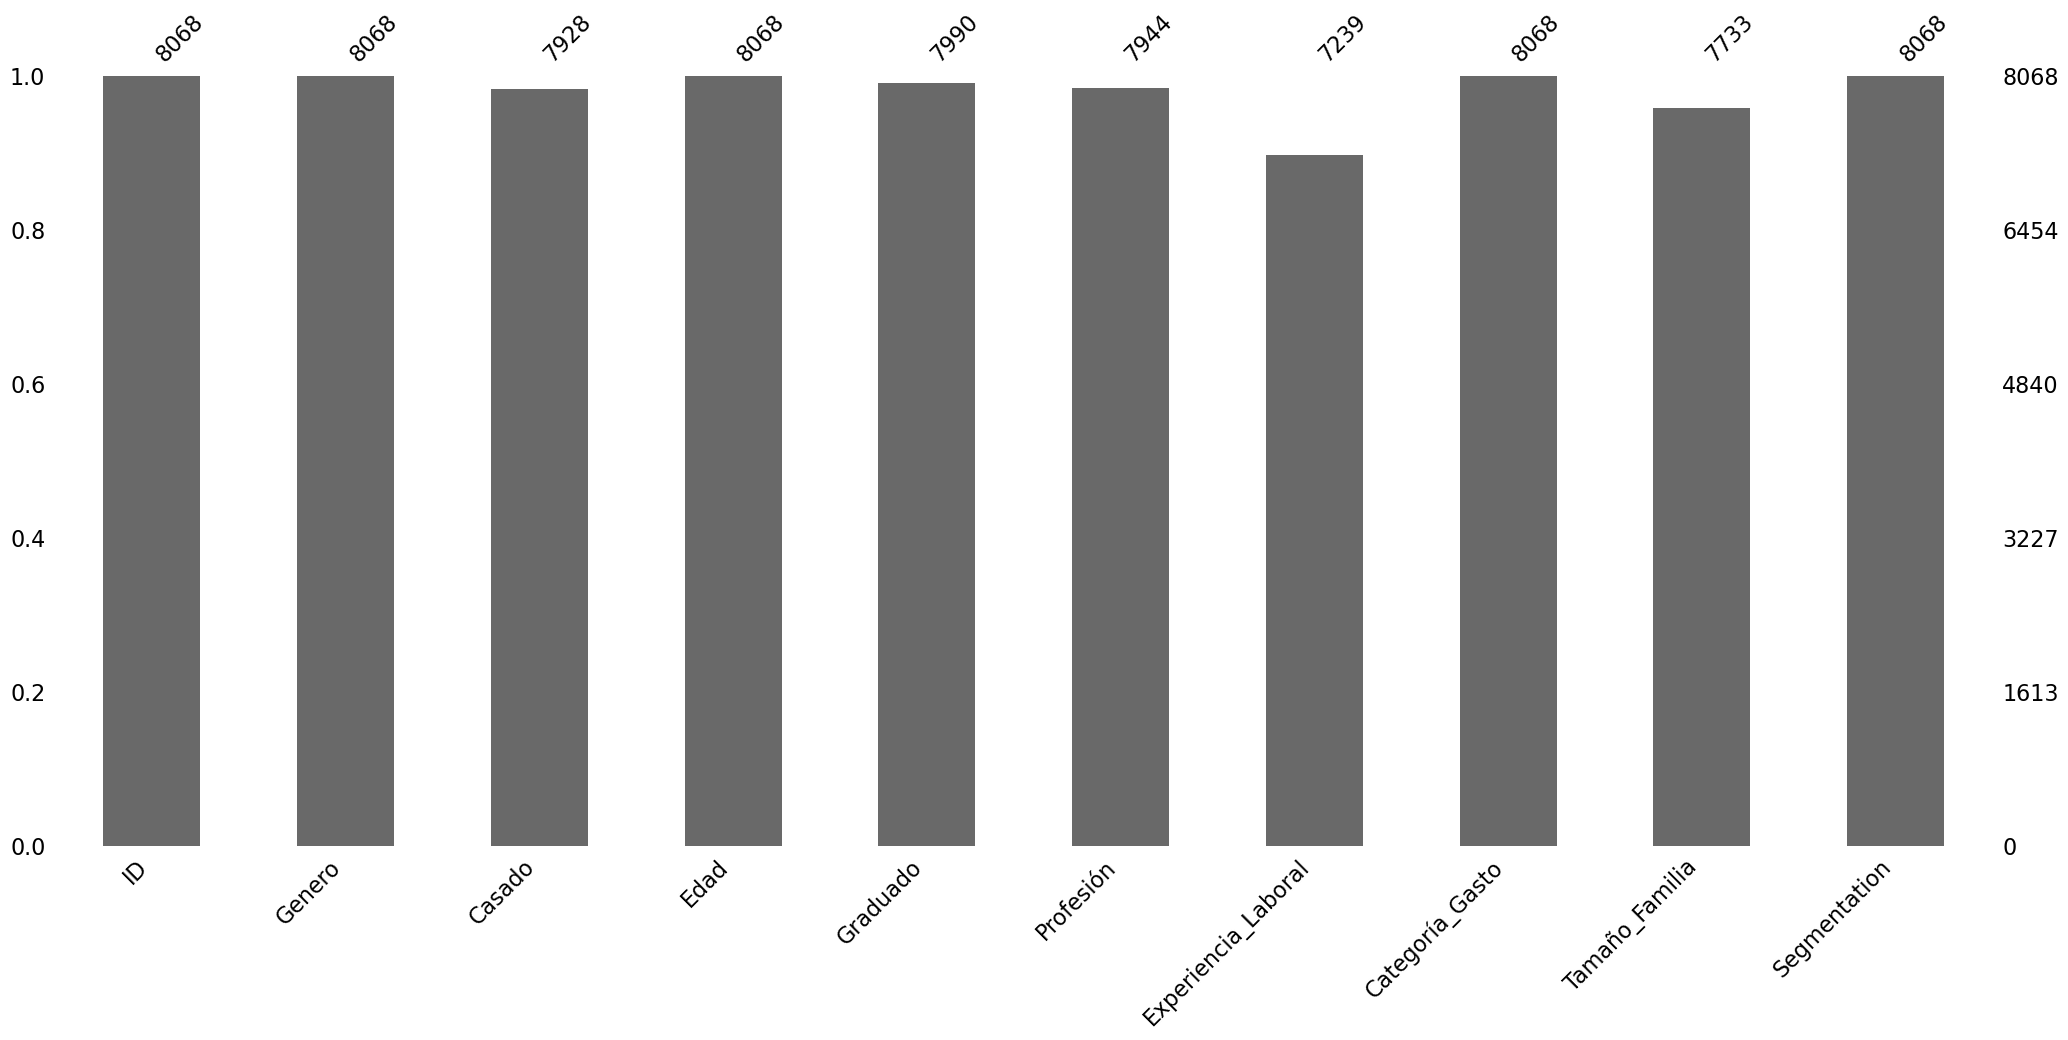

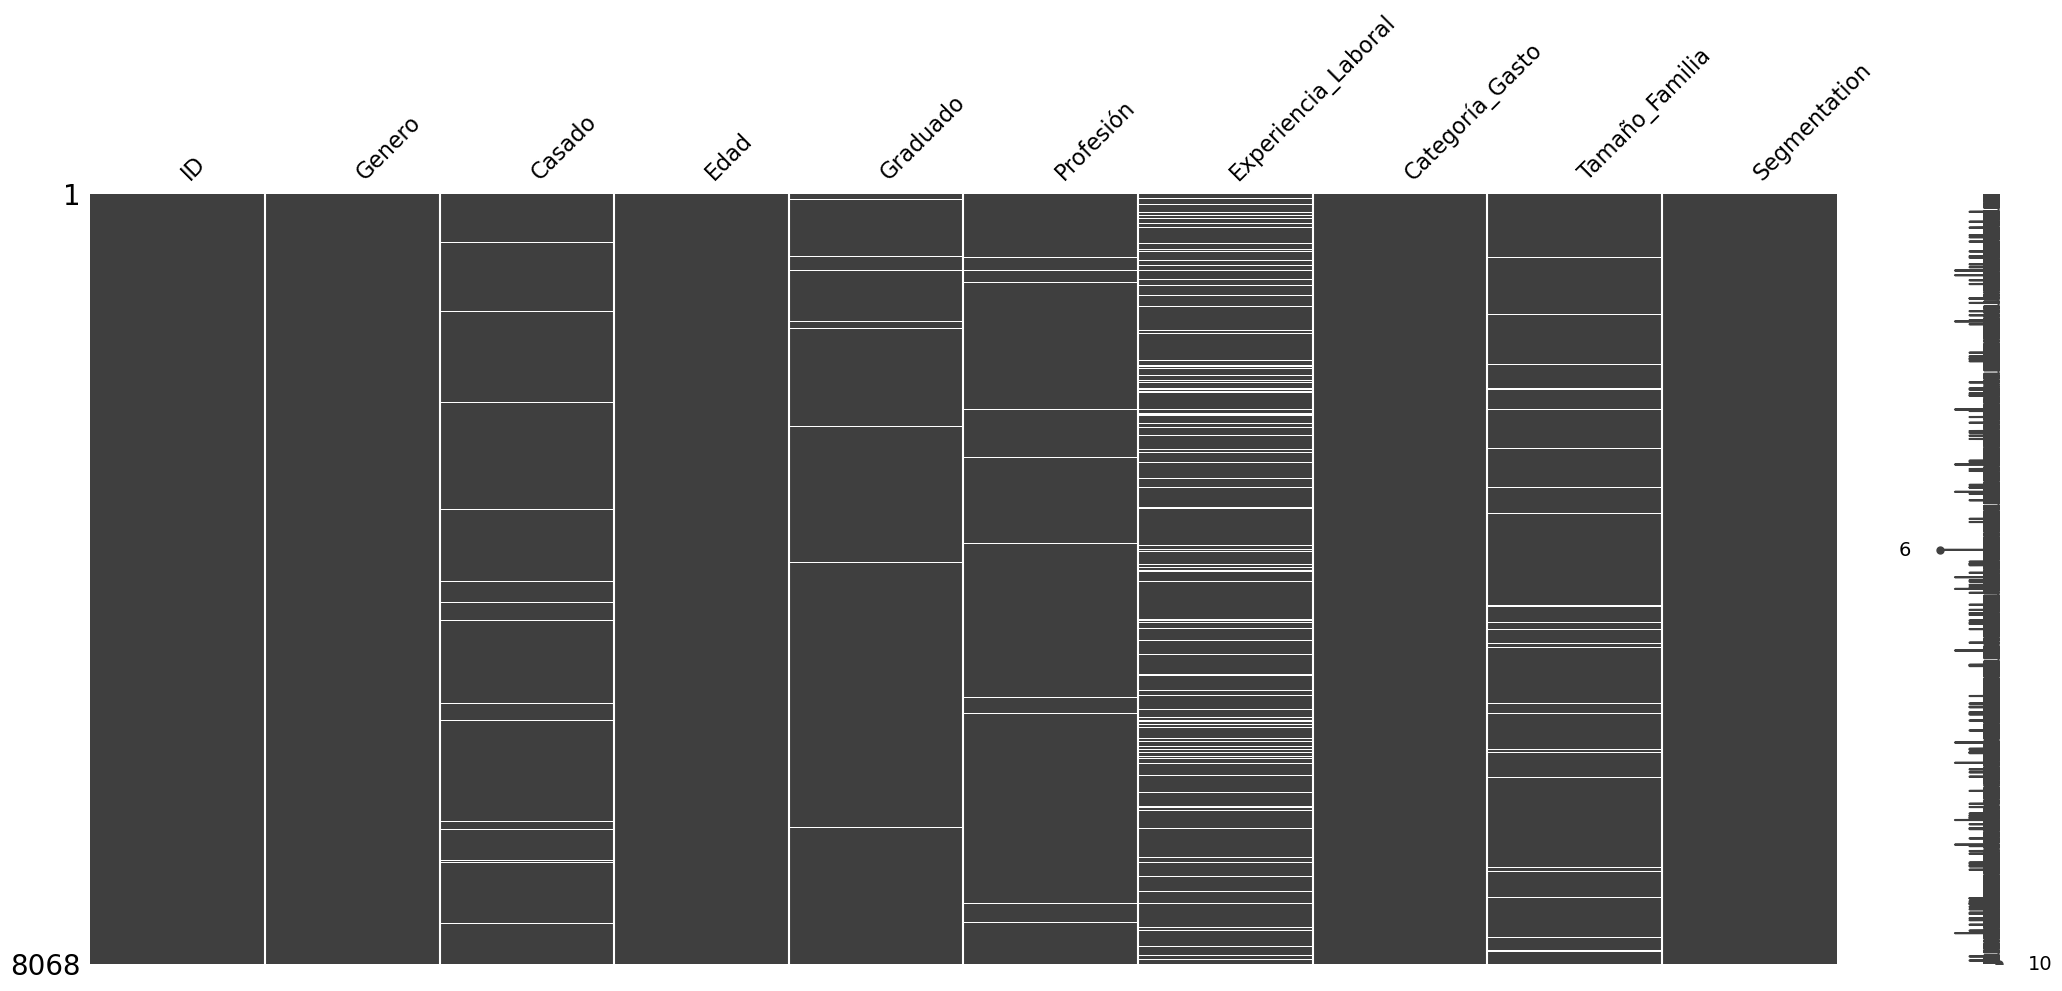

<Figure size 400x200 with 0 Axes>

In [13]:
msno.bar(Base)
msno.matrix(Base)
plt.figure(figsize=(4, 2))
plt.show()

In [14]:
Base = Base.dropna(subset=['Profesión'])

# Se reemplazan los datos nulos con el valor más frecuente para varaibles categóricas
Base['Casado'].fillna(Base['Casado'].mode()[0], inplace=True)
Base['Graduado'].fillna(Base['Graduado'].mode()[0], inplace=True)

# Se reemplazan los datos nulos con la media para varaibles numéricas
Base['Experiencia_Laboral'].fillna(Base['Experiencia_Laboral'].median(), inplace=True)
Base['Tamaño_Familia'].fillna(Base['Tamaño_Familia'].median(), inplace=True)

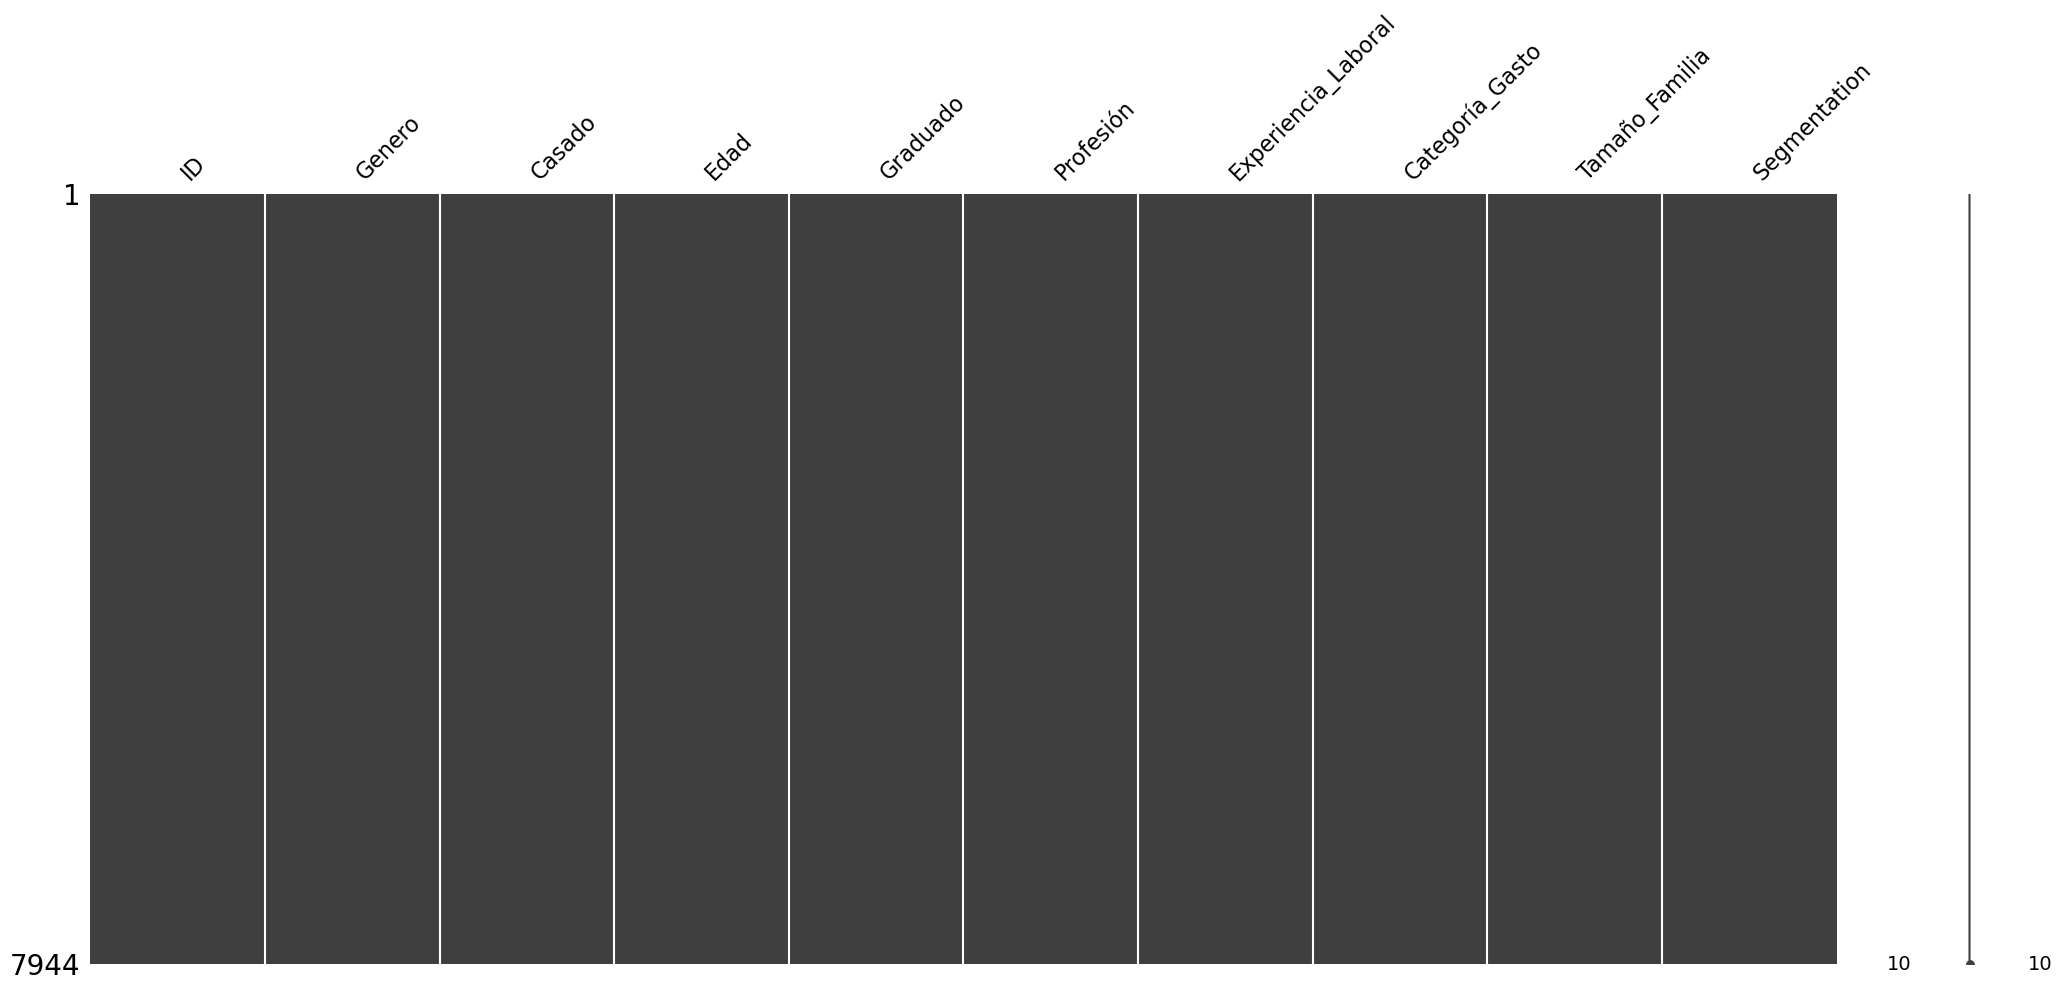

<Figure size 400x200 with 0 Axes>

In [15]:
import missingno as msno
msno.matrix(Base)
plt.figure(figsize=(4, 2))
plt.show()

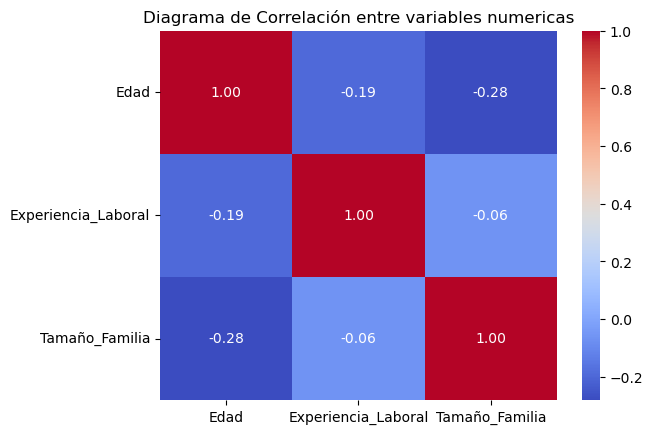

Male      54.783484
Female    45.216516
Name: Genero, dtype: float64

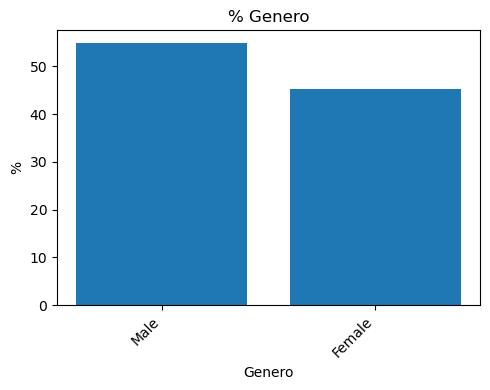

Yes    59.277442
No     40.722558
Name: Casado, dtype: float64

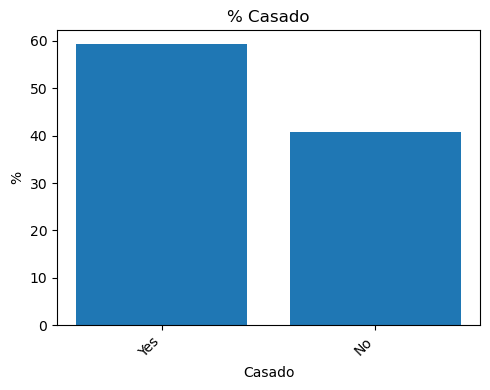

Yes    62.76435
No     37.23565
Name: Graduado, dtype: float64

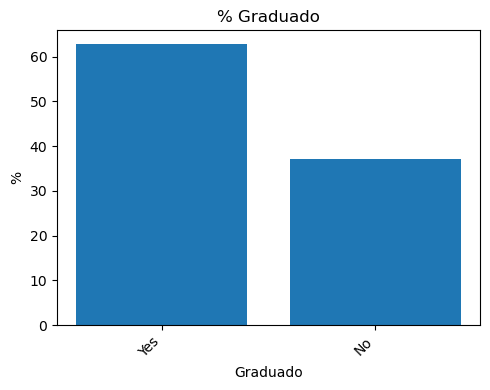

Artist           31.671702
Healthcare       16.767372
Entertainment    11.946123
Engineer          8.799094
Doctor            8.660624
Lawyer            7.842397
Executive         7.540282
Marketing         3.675730
Homemaker         3.096677
Name: Profesión, dtype: float64

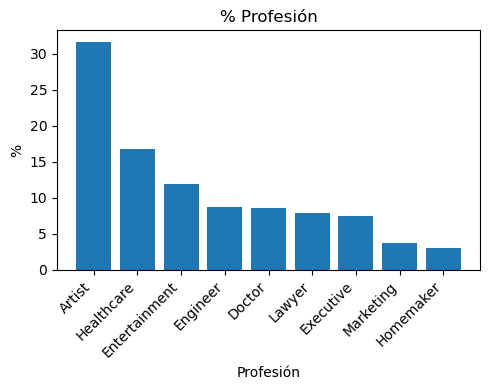

Low        60.410373
Average    24.420947
High       15.168681
Name: Categoría_Gasto, dtype: float64

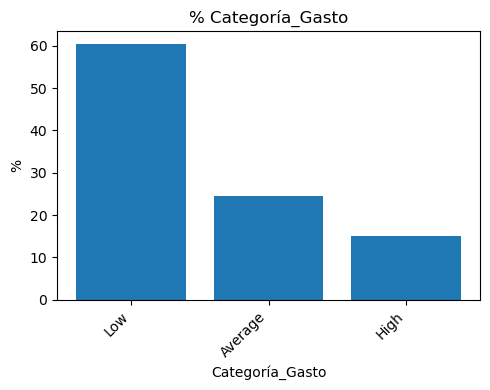

D    27.907855
C    24.572004
A    24.408359
B    23.111782
Name: Segmentation, dtype: float64

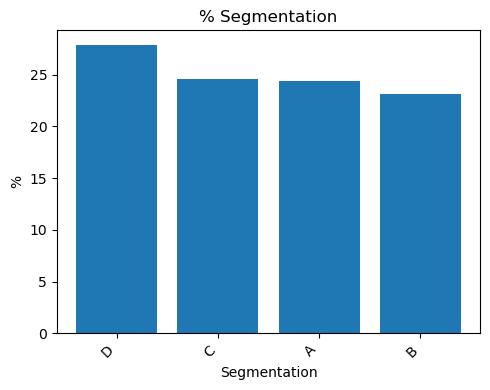

In [16]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Diagrama de Correlación entre variables numericas')
plt.show()

Variables_Categoricas = Base.drop(columns=list(Variables_Numericas) + ['ID']).columns
for Variable in Variables_Categoricas:
    frecuencia = Base[Variable].value_counts(normalize=True) * 100
    display(frecuencia)
    fig = plt.figure(figsize=(5, 4))  # Ajusta el tamaño de la figura según tus necesidades
    plt.bar(frecuencia.index, frecuencia.values)
    plt.xlabel(Variable)
    plt.ylabel('%')
    plt.title('% ' + Variable)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Al realizar la imputación de los valores nulos utilizando la mediana para las variables numéricas, se puede observar que las correlaciones entre las variables no cambian. Por otra parte, realizar la imputación de valores nulos utilizando la moda en las variables categóricasy eliminar los valores nulos de la columna "Profseión", se mantiene la distribución de porcentajes en las diferentes categorías, lo que asegura que no se altere la proporción relativa entre ellas.
Esto sugiere que este enfoque de imputación mantiene la estructura de los datos, lo que es importante para evitar introducir sesgos en los análisis posteriores.

### Desarrollo del Modelo (Presentación del Mejor Modelo)

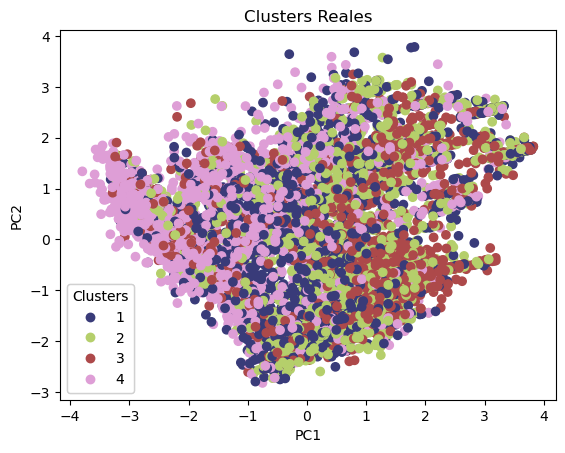

In [17]:
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

def agrupar_profesion(profesion):
    if profesion in ['Healthcare', 'Doctor']:
        return 'Salud'
    elif profesion in ['Engineer']:
        return 'Ingeniería'
    elif profesion in ['Lawyer']:
        return 'Legal'
    elif profesion in ['Entertainment', 'Artist']:
        return 'Arte y Entretenimiento'
    elif profesion in ['Executive', 'Marketing']:
        return 'Negocios y Marketing'
    elif profesion in ['Homemaker']:
        return 'Ama de casa'
    else:
        return 'Otros'

Base['Profesion_2'] = Base['Profesión'].apply(agrupar_profesion)
Dummies = pd.get_dummies(Base[['Profesion_2']], prefix=['Prof'], dtype=int)
Base_Dummies = pd.concat([Base, Dummies], axis=1)
Base_Dummies['Casado'] = Base_Dummies['Casado'].replace({'Yes': 1, 'No': 0})
Base_Dummies['Graduado'] = Base_Dummies['Graduado'].replace({'Yes': 1, 'No': 0})
Base_Dummies['Genero'] = Base_Dummies['Genero'].replace({'Female': 1, 'Male': 0})
Base_Dummies['Categoría_Gasto'] = Base_Dummies['Categoría_Gasto'].replace({'Low': 1, 'Average': 2, 'High': 3})
Base_Dummies['Segmentation'] = Base_Dummies['Segmentation'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4})

Base_Dummies_Modelar = Base_Dummies.drop(columns=['ID', 'Segmentation','Profesión','Profesion_2','Genero'])
scaler = StandardScaler()
Base_Dummies_Escalada = pd.DataFrame(scaler.fit_transform(Base_Dummies_Modelar),columns=Base_Dummies_Modelar.columns)

Base_Dummies_2_Componentes = pd.DataFrame(PCA(n_components = 2).fit_transform(Base_Dummies_Escalada), columns=['PC1', 'PC2'])
Base_Dummies.reset_index(drop=True, inplace=True)
Base_Dummies_2_Componentes.reset_index(drop=True, inplace=True)

Base_Clusters = pd.concat([Base_Dummies, Base_Dummies_2_Componentes], axis=1)

scatter = plt.scatter(Base_Clusters['PC1'], Base_Clusters['PC2'], c = Base_Clusters['Segmentation'], cmap='tab20b')
plt.title('Clusters Reales')
plt.xlabel('PC1')
plt.ylabel('PC2')
leyenda = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(leyenda)
plt.show()

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
Base_Dummies_Escalada_Reducida = pd.DataFrame(pca.fit_transform(Base_Dummies_Escalada))

#### Determinación del número óptimo de clúster

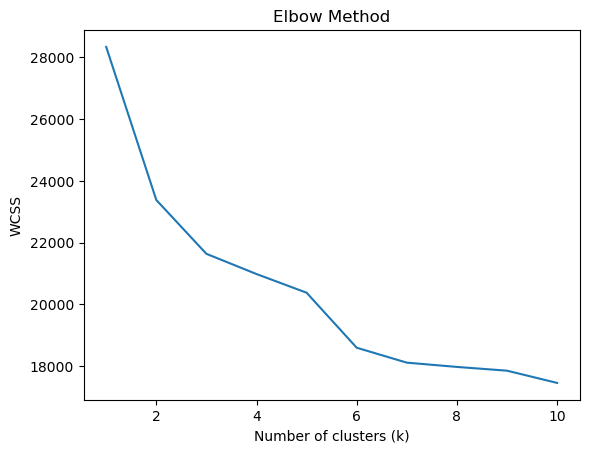

In [18]:
wcss = []
for i in range(1, 11):
    K_Medoides = KMedoids(n_clusters=i, random_state=42)
    K_Medoides.fit(Base_Dummies_Escalada_Reducida)
    wcss.append(K_Medoides.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

#### Modelo no Supervisado K-Medoides

Cluster_K_Medoides    0    1     2     3
Segmentation                            
1                   565  451   597   326
2                   305  368   946   217
3                   175  230  1296   251
4                   378  240   264  1335


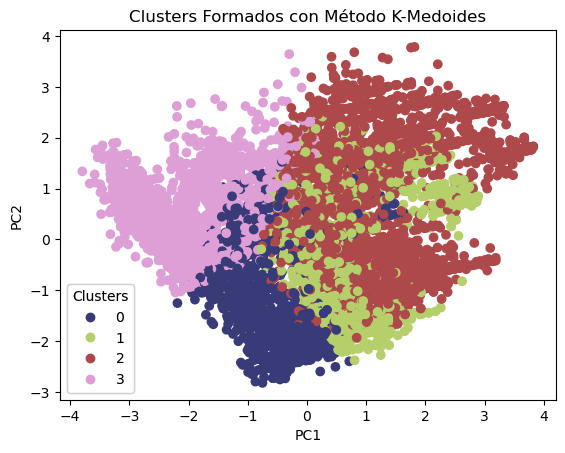

Adjusted Rand Index: 0.12502484006218637


In [19]:
Base_Modelo = Base_Dummies_Escalada_Reducida.copy()

K_Medoides = KMedoids(n_clusters = 4, random_state = 123).fit(Base_Modelo)
Clusters_Metodo_KMedoides = pd.DataFrame(K_Medoides.labels_.astype(int), columns=['Cluster_K_Medoides'])

Base_Clusters.reset_index(drop=True, inplace=True)
Clusters_Metodo_KMedoides.reset_index(drop=True, inplace=True)

Base_Clusters = pd.concat([Base_Clusters, Clusters_Metodo_KMedoides], axis=1)

cross_tab = pd.crosstab(Base_Clusters['Segmentation'], Base_Clusters['Cluster_K_Medoides'])
print(cross_tab)

scatter = plt.scatter(Base_Clusters['PC1'], Base_Clusters['PC2'], c = Base_Clusters['Cluster_K_Medoides'], cmap='tab20b')
plt.title('Clusters Formados con Método K-Medoides')
plt.xlabel('PC1')
plt.ylabel('PC2')
leyenda = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(leyenda)
plt.show()

ari = adjusted_rand_score(Base_Clusters['Segmentation'], Base_Clusters['Cluster_K_Medoides'])
print(f"Adjusted Rand Index: {ari}")

### Descripción de los Clusters Formados con Método K-Medoides

In [20]:
Base.reset_index(drop=True, inplace=True)
Clusters_Metodo_KMedoides.reset_index(drop=True, inplace=True)

Base_Cluster_Final = pd.concat([Base, Clusters_Metodo_KMedoides], axis=1)

In [21]:
Base_Cluster_Final.to_excel(r"../Resultados/Base_Cluster_Final.xlsx", index=False)

In [22]:
# Cluster 0
Cluster_0 = Base_Cluster_Final[Base_Cluster_Final['Cluster_K_Medoides'] == 0]

display(Cluster_0[['Edad','Experiencia_Laboral','Tamaño_Familia']].describe())

for columna in ['Genero', 'Casado', 'Graduado', 'Profesion_2', 'Categoría_Gasto']:
    porcentaje = Cluster_0[columna].value_counts(normalize=True) * 100
    print(porcentaje)
    print("")

,Edad,Experiencia_Laboral,Tamaño_Familia
count,1423.000000,1423.000000,1423.000000
mean,38.027407,3.687983,2.104006
std,9.728521,4.005048,1.375547
min,18.000000,0.000000,1.000000
25%,31.000000,1.000000,1.000000
50%,37.000000,1.000000,2.000000
75%,43.000000,8.000000,3.000000
max,77.000000,14.000000,9.000000


Female    56.99227
Male      43.00773
Name: Genero, dtype: float64

No     97.470134
Yes     2.529866
Name: Casado, dtype: float64

Yes    80.674631
No     19.325369
Name: Graduado, dtype: float64

Arte y Entretenimiento    74.420239
Ingeniería                10.119466
Negocios y Marketing       6.465214
Ama de casa                5.692200
Legal                      1.827126
Salud                      1.475755
Name: Profesion_2, dtype: float64

Low    100.0
Name: Categoría_Gasto, dtype: float64



#### **Descripción Clúster 0 (1.423 Personas)**

**Variables Numéricas:** Las personas de este clúster tienen una edad promedio de 38 años, con familias de 2 integrantes y 4 años de experiencia laboral en promedio. Sin embargo, el 50% posee tiene 1 año de experiencia laboral. 

**Variables Categóricas:** En este clúster el 57% son hombres, el 97% están casados, el 81% son graduados, y la profesión predominante es arte y entretenimiento, representando al 74% de las personas, además se resalta que aquí todos tienen categoría de gasto baja. 

In [23]:
# Cluster 1
Cluster_1 = Base_Cluster_Final[Base_Cluster_Final['Cluster_K_Medoides'] == 1]

display(Cluster_1[['Edad','Experiencia_Laboral','Tamaño_Familia']].describe())

for columna in ['Genero', 'Casado', 'Graduado', 'Profesion_2', 'Categoría_Gasto']:
    porcentaje = Cluster_1[columna].value_counts(normalize=True) * 100
    print(porcentaje)
    print("")

,Edad,Experiencia_Laboral,Tamaño_Familia
count,1289.000000,1289.000000,1289.000000
mean,56.020171,1.788984,1.863460
std,15.954795,2.601153,0.920762
min,19.000000,0.000000,1.000000
25%,43.000000,0.000000,1.000000
50%,53.000000,1.000000,2.000000
75%,68.000000,1.000000,2.000000
max,89.000000,13.000000,5.000000


Male      60.977502
Female    39.022498
Name: Genero, dtype: float64

Yes    98.060512
No      1.939488
Name: Casado, dtype: float64

Yes    73.157486
No     26.842514
Name: Graduado, dtype: float64

Arte y Entretenimiento    55.314197
Legal                     19.394880
Ingeniería                 9.697440
Negocios y Marketing       7.835531
Salud                      4.887510
Ama de casa                2.870442
Name: Profesion_2, dtype: float64

Low        99.92242
Average     0.07758
Name: Categoría_Gasto, dtype: float64



#### **Descripción Clúster 1 (1.289 Personas)**

**Principales Diferencias Clúster 1 vs Clúster 0:** 

- Mayor edad promedio (la más alta en comparación con los otros clústeres). 
- Menos años de experiencia laboral. 
- Menor porcentaje de graduados. 
- Aunque la profesión de Arte y Entretenimiento sigue siendo la predominante, su proporción disminuye, y la profesión legal se posiciona como la segunda más importante. 

**Variables Numéricas:** Las personas en este clúster tienen una edad promedio de 56 años, con familias de 2 integrantes y 2 años de experiencia laboral, siendo este valor igual tanto en la media como en la mediana.   

**Variables Categóricas:** En este clúster, el 61% son hombres, el 98% están casados, el 73% están graduados y el 99,9% tienen categoría de gasto baja. La profesión predominante es Arte y Entretenimiento, representando al 55% de las personas, mientras que la profesión legal ocupa el segundo lugar con un 19%.   

In [24]:
# Cluster 2
Cluster_2 = Base_Cluster_Final[Base_Cluster_Final['Cluster_K_Medoides'] == 2]

display(Cluster_2[['Edad','Experiencia_Laboral','Tamaño_Familia']].describe())

for columna in ['Genero', 'Casado', 'Graduado', 'Profesion_2', 'Categoría_Gasto']:
    porcentaje = Cluster_2[columna].value_counts(normalize=True) * 100
    print(porcentaje)
    print("")

,Edad,Experiencia_Laboral,Tamaño_Familia
count,3103.000000,3103.000000,3103.000000
mean,51.303899,2.273928,3.064131
std,14.900275,3.046447,1.244490
min,18.000000,0.000000,1.000000
25%,40.000000,0.000000,2.000000
50%,49.000000,1.000000,3.000000
75%,61.000000,3.000000,4.000000
max,89.000000,14.000000,9.000000


Male      58.491782
Female    41.508218
Name: Genero, dtype: float64

Yes    100.0
Name: Casado, dtype: float64

Yes    73.090558
No     26.909442
Name: Graduado, dtype: float64

Arte y Entretenimiento    53.818885
Negocios y Marketing      17.048018
Legal                     11.086046
Ingeniería                 8.894618
Salud                      6.316468
Ama de casa                2.835965
Name: Profesion_2, dtype: float64

Average    59.748630
High       37.995488
Low         2.255881
Name: Categoría_Gasto, dtype: float64



#### **Descripción Clúster 2 (3.103 Personas)**

**Principales Diferencias Clúster 2 vs Clúster 0 y 1:**

- Aumento del número de integrantes en la familia a 3. 
- Todos los integrantes están casados.   
- La segunda profesión más relevante es Negocios y Marketing. 
- La mayoría de las personas tienen una categoría de gasto media.   
- Es el único clúster con la mayor proporción de personas en la categoría de gasto alta. 
- Es el clúster con mayor número de personas. 

**Variables Numéricas:** En este clúster, las personas tienen una edad promedio de 51 años, con familias de 3 integrantes y 2 años de experiencia laboral. 

**Variables Categóricas:** El 58% de las personas en este clúster son hombres, el 100% están casados y el 73% son graduados. El 60% tiene una categoría de gasto media, mientras que el 38% pertenece a la categoría de gasto alta. La profesión predominante es Arte y Entretenimiento, con un 53%, seguida de Negocios y Marketing, con un 17%.   

In [25]:
# Cluster 3
Cluster_3 = Base_Cluster_Final[Base_Cluster_Final['Cluster_K_Medoides'] == 3]

display(Cluster_3[['Edad','Experiencia_Laboral','Tamaño_Familia']].describe())

for columna in ['Genero', 'Casado', 'Graduado', 'Profesion_2', 'Categoría_Gasto']:
    porcentaje = Cluster_3[columna].value_counts(normalize=True) * 100
    print(porcentaje)
    print("")

,Edad,Experiencia_Laboral,Tamaño_Familia
count,2129.000000,2129.000000,2129.000000
mean,28.146548,2.386566,3.661343
std,7.939097,3.199423,1.633304
min,18.000000,0.000000,1.000000
25%,22.000000,0.000000,3.000000
50%,27.000000,1.000000,4.000000
75%,32.000000,3.000000,4.000000
max,70.000000,14.000000,9.000000


Male      53.499295
Female    46.500705
Name: Genero, dtype: float64

No     85.627055
Yes    14.372945
Name: Casado, dtype: float64

No     70.549554
Yes    29.450446
Name: Graduado, dtype: float64

Salud                     81.728511
Negocios y Marketing       7.937999
Ingeniería                 7.233443
Ama de casa                1.878816
Arte y Entretenimiento     1.080319
Legal                      0.140911
Name: Profesion_2, dtype: float64

Low        94.786285
Average     3.992485
High        1.221231
Name: Categoría_Gasto, dtype: float64



#### **Descripción Clúster 3 (2.129 Personas)**

**Principales Diferencias Clúster 3 vs Clúster 0, 1 y 2:**

- Es el clúster con la menor edad promedio y el mayor número de integrantes en la familia. 
- Mayor proporción de mujeres. 
- Menor porcentaje de personas casadas. 
- La profesión principal es el sector salud. 

**Variables Numéricas:** Las personas en este clúster tienen una edad promedio de 28 años, viven en familias de 4 integrantes y cuentan con 2 años de experiencia laboral. 

**Variables Categóricas:** El 53% de los integrantes de este clúster son hombres, el 86% están casados y el 70% son graduados. Además, el 95% pertenece a la categoría de gasto baja, y la profesión predominante es salud, representando al 82% de las personas. 

**Conclusión Final**

Dado que el objetivo es maximizar las ventas de automóviles mediante la identificación de un grupo objetivo que permita atraer nuevos clientes a la empresa, y que esto implica diseñar estrategias de mercadeo para generar una respuesta de compra en el consumidor final, se recomienda enfocar las campañas de marketing en el clúster 2. 

Este clúster destaca entre los cuatro analizados por ser el que reúne al mayor número de personas, además de contar con una mayoría de integrantes que presentan una categoría de gasto media o alta, lo que lo convierte en un objetivo clave para las estrategias comerciales. Con una experiencia laboral promedio de 2 años, el grupo podría reflejar estabilidad financiera. Las familias en este clúster, con un promedio de 3 integrantes, lo hacen especialmente atractivo para promover la compra de automóviles, ya que ofrecen una solución cómoda para el transporte familiar, a diferencia de otros vehículos como las motocicletas. 

Un aspecto clave es la diversidad en la distribución de profesiones dentro del clúster 2, lo que permite adaptar las campañas a diferentes públicos. El automóvil no solo sería útil en el ámbito familiar, sino también para satisfacer necesidades de movilidad laboral. Por ejemplo, personas que trabajan en arte y entretenimiento, abogados, ingenieros, o quienes requieren un vehículo para sus actividades profesionales, encontrarán en el automóvil una solución versátil tanto para la vida personal como laboral.